<h1><p style='display: block; text-align: center;'>Plan Your Next Eclipse Viewing in Tokyo</p></h1>

<h3><p style='display: block; text-align: center;'>with Jupyter and Geopandas</p></h3>

<h5><p style='display: block; text-align: center;'>Asami Minei</p></h5>

### What this project do?

1. When and where will we able to see an eclipse?
2. Which upcoming eclipse will pass over Japan?
3. What are the largest cities in the eclipse in Japan?

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import packages
import pandas as pd
import geopandas as gpd

In [3]:
# download the wrold map from Geopandas
world =gpd.read_file( gpd.datasets.get_path('naturalearth_lowres')  )
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot:>

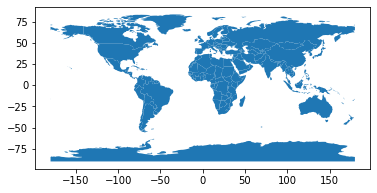

In [5]:
world.plot()

In [6]:
# import cities.shp
import os 
data_path= "../Data/"
cities=gpd.read_file(os.path.join(data_path, "ne_10m_populated_places.shp") )
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
cities.head(6488)
Jap_cities = cities[cities.ADM0NAME=='Japan']
Jap_cities

,NAME,ADM0NAME,POP,geometry
1192,Okayama,Japan,866092,POINT (133.91709 34.67203)
1193,Shimonoseki,Japan,245786,POINT (130.94543 33.96543)
1199,Kanoya,Japan,82335,POINT (130.85004 31.38332)
1200,Takamatsu,Japan,334223,POINT (134.04478 34.34474)
1201,Tokushima,Japan,443760,POINT (134.55250 34.06739)
...,...,...,...,...
6126,Nagasaki,Japan,435455,POINT (129.88503 32.76499)
6338,Hiroshima,Japan,2045000,POINT (132.44097 34.38978)
6342,Sapporo,Japan,2544000,POINT (141.33810 43.07693)
6403,Ōsaka,Japan,11294000,POINT (135.45820 34.75198)


In [8]:
cities[cities.ADM0NAME=='Japan'][['NAME', 'ADM0NAME', 'POP']]

,NAME,ADM0NAME,POP
1192,Okayama,Japan,866092
1193,Shimonoseki,Japan,245786
1199,Kanoya,Japan,82335
1200,Takamatsu,Japan,334223
1201,Tokushima,Japan,443760
...,...,...,...
6126,Nagasaki,Japan,435455
6338,Hiroshima,Japan,2045000
6342,Sapporo,Japan,2544000
6403,Ōsaka,Japan,11294000


In [9]:
cities[(cities.ADM0NAME=='Japan') & (cities.POP >= 10000000)]

,NAME,ADM0NAME,POP,geometry
6403,Ōsaka,Japan,11294000,POINT (135.45820 34.75198)
6435,Tokyo,Japan,35676000,POINT (139.74946 35.68696)


In [10]:
Jap_cities.sort_values('POP', ascending=False)

,NAME,ADM0NAME,POP,geometry
6435,Tokyo,Japan,35676000,POINT (139.74946 35.68696)
6403,Ōsaka,Japan,11294000,POINT (135.45820 34.75198)
4625,Yokohama,Japan,3697894,POINT (139.60202 35.43066)
5736,Nagoya,Japan,3230000,POINT (136.91305 35.15694)
5722,Fukuoka,Japan,2792000,POINT (130.40807 33.59696)
...,...,...,...,...
3375,Kitami,Japan,113137,POINT (143.89999 43.85036)
5742,Sakata,Japan,100446,POINT (139.85006 38.92004)
3385,Tsuruoka,Japan,99820,POINT (139.83021 38.70041)
3378,Maizuru,Japan,92465,POINT (135.33333 35.45041)


In [11]:
Jap_cities.agg({'POP': ['mean','max', 'min']})

,POP
mean,1.300183e+06
max,3.567600e+07
min,8.233500e+04


<AxesSubplot:>

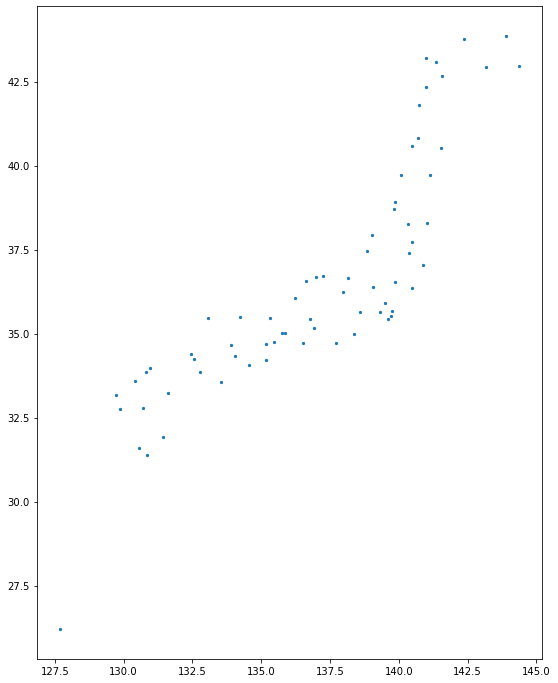

In [12]:
Jap_cities.plot(figsize=(10,12), markersize=5)

In [13]:
# Load in Eclipse data
ec = gpd.read_file(os.path.join(data_path,"TotEclip_2024_37.shp"))[[ 'Year', 'Date','FolderPath', 'geometry']]
ec

,Year,Date,FolderPath,geometry
0,2026,2026-08-12,TSE 2026.08.12/TSE 2026 August 12 Umbral Path,"POLYGON Z ((113.47350 75.08388 0.00000, 108.70..."
1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path,"POLYGON Z ((-44.46106 27.95853 0.00000, -44.92..."
2,2028,2028-07-22,TSE 2028.07.22/TSE 2028 July 22 Umbral Path,"POLYGON Z ((75.66460 -18.38347 0.00000, 75.768..."
3,2030,2030-11-25,TSE 2030.11.25/TSE 2030 November 25 Umbral Path,"POLYGON Z ((1.61298 -16.21279 0.00000, 1.91056..."
4,2033,2033-03-30,TSE 2033/03/30/TSE 2033 March 30 Umbral Path,"POLYGON Z ((180.00000 78.09851 0.00000, 179.45..."
5,2033,2033-03-30,TSE 2033/03/30/TSE 2033 March 30 Umbral Path,"POLYGON Z ((-180.00000 65.53219 0.00000, -180...."
6,2033,2033-03-30,TSE 2033/03/30/TSE 2033 March 30 Umbral Path,"POLYGON Z ((180.00000 65.53219 0.00000, 179.93..."
7,2034,2034-03-20,TSE 2034/03/20/TSE 2034 March 20 Umbral Path,"POLYGON Z ((-37.53485 -0.94519 0.00000, -37.59..."
8,2035,2035-09-02,TSE 2035/09/02/TSE 2035 September 02 Umbral Path,"POLYGON Z ((-180.00000 17.35682 0.00000, -179...."
9,2035,2035-09-02,TSE 2035/09/02/TSE 2035 September 02 Umbral Path,"POLYGON Z ((180.00000 17.35682 0.00000, 180.00..."


In [22]:
# start by getting all the cities that intersect any eclipse
# spatial join using geom clumn
e_cities = gpd.sjoin(cities, ec, how='inner', op='intersects')
e_cities

,NAME,ADM0NAME,POP,geometry,index_right,Year,Date,FolderPath
12,Kasserine,Tunisia,76243,POINT (8.71670 35.21670),1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path
13,Sdid Bouzid,Tunisia,42098,POINT (9.50000 35.01670),1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path
15,Mahdia,Tunisia,45977,POINT (11.04088 35.48391),1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path
427,Bordj Bou Arréridj,Algeria,140000,POINT (4.63000 36.05900),1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path
428,M'sila,Algeria,150000,POINT (4.54500 35.70000),1,2027,2027-08-02,TSE 2027.08.02/TSE 2027 August 02 Umbral Path
...,...,...,...,...,...,...,...,...
5911,Dubbo,Australia,31574,POINT (148.59733 -32.25996),2,2028,2028-07-22,TSE 2028.07.22/TSE 2028 July 22 Umbral Path
6442,Sydney,Australia,4630000,POINT (151.18323 -33.91807),2,2028,2028-07-22,TSE 2028.07.22/TSE 2028 July 22 Umbral Path
6466,Queenstown,New Zealand,16600,POINT (168.72508 -45.02267),2,2028,2028-07-22,TSE 2028.07.22/TSE 2028 July 22 Umbral Path
6472,Dunedin,New Zealand,117700,POINT (170.49102 -45.88542),2,2028,2028-07-22,TSE 2028.07.22/TSE 2028 July 22 Umbral Path


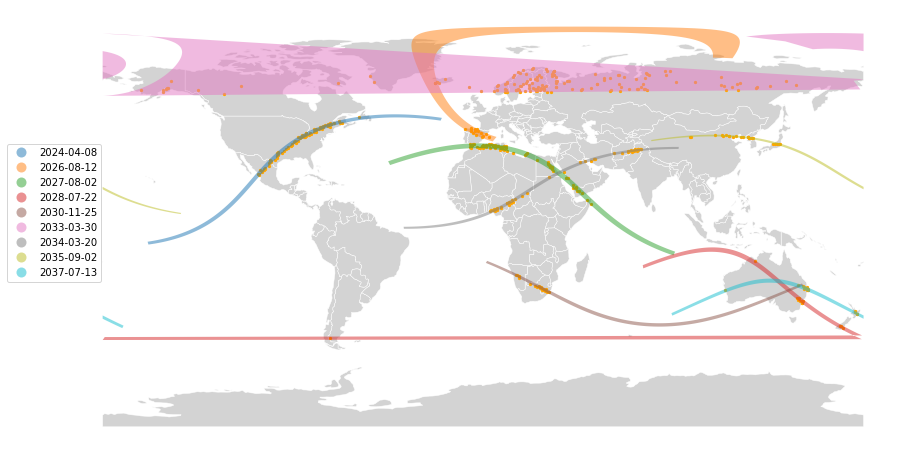

In [18]:
place = input('Enter a name of country that you want to see your next eclipse between 2024 and 2037').capitalize()

Enter a name of country that you want to see your next eclipse between 2024 and 2037Japan


In [41]:
# place  cities[(cities.ADM0NAME=='Japan')
my_cities = e_cities[(e_cities.ADM0NAME==place)]
my_country= world[(world.name==place)]
year = int(my_cities[['Year']].min() )

In [33]:
# extract your eclipse by year
my_ec=ec[(ec['Year']== year)]

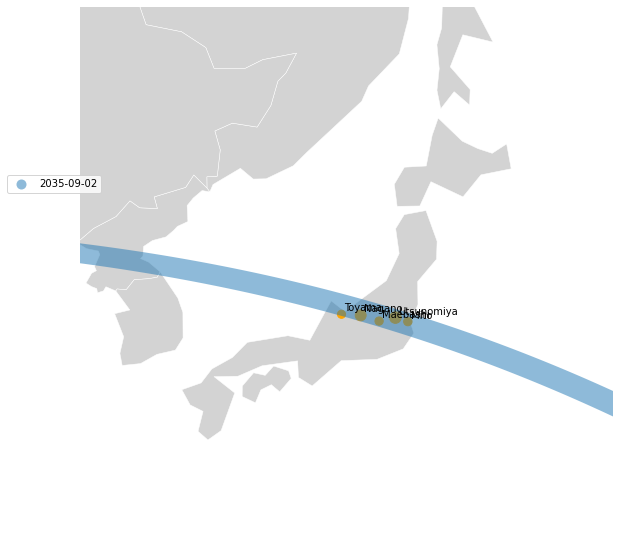

In [70]:
base = world.plot(color='lightgray',figsize=(15,10), linewidth=0.5, edgecolor='white')
my_cities.plot(ax=base, color='orange', markersize=my_cities['POP']/5000)
my_ec.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Date', legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))
bounds = my_country.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
for x,y, label in zip (my_cities.geometry.x, my_cities.geometry.y, my_cities.NAME):
    base.annotate(label, xy=(x,y),xytext=(3, 3), textcoords="offset points")


In [46]:
print('Wow! There are {} cities in the eclipse path!'.format(len(my_cities)))
print("Here are the largest 5:")
print(my_cities.sort_values('POP', ascending = False)['NAME'].head(5))

Wow! There are 5 cities in the eclipse path!
Here are the largest 5:
1222    Utsunomiya
5737        Nagano
3380          Mito
1219      Maebashi
1216        Toyama
Name: NAME, dtype: object


In [71]:
import folium

In [89]:
# Let's find the centroid of the eclipse we chose, so that we can center our folium map on it
x = my_country.centroid.x.values[0]
y = my_country.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

y: 37.66311081170466, x: 138.06496213270776


In [ ]:
map_stamen_water = folium.Map(
    location=[y,x],
    tiles='stamenwatercolor',
    zoom_start=3
)

folium.GeoJson(top_five,name='Eclipse Cities').add_to(map_stamen_water)
folium.GeoJson(my_eclipse,name='Eclipse Path').add_to(map_stamen_water)

folium.LayerControl().add_to(map_stamen_water)

In [2]:
map_stamen_water = folium.Map(
    location=[y,x],
    tiles='stamenwatercolor',
    zoom_start=5
)
folium.GeoJson(my_cities, name='Eclipse Cities').add_to(map_stamen_water)
folium.GeoJson(my_ec, name='Eclipse Path').add_to(map_stamen_water)

NameError: name 'folium' is not defined

In [96]:
map_stamen_water

In [9]:
a = """
=========================================================================================================================
Where is your Next Eclipse in your Country?
This function asks you to input a name of county and output a year and cities that next eclipse passes over.
Then, an intereactive map will apper to see the cities and the eclipse path in your selected country.
Without further due, let's get started!
=========================================================================================================================
"""
print(a)


Where is your Next Eclipse in your Country?
This function asks you to input a name of county and output a year and cities that next eclipse passes over.
Then, an intereactive map will apper to see the cities and the eclipse path in your selected country.
Without further due, let's get started!



In [13]:
# Create a function named NextEclipse  NextExlipseInYourCountry

# Input the country name and it prints a statement of when and where will you be able to see your next eclipse

# Step 1: ask the user to input the country name. If it s not in the list, ask for the entry again
# Type EXIT to get out of the loop.

# Step 2: Say if you select, Japan, you select the cities in Japan. Then, select the min yeaer from the cities layer

# Step 3: Select your eclipse based on the year. 

# Step 4: create an interactive map and plot the cities, eclipse, label city names and centered to your country

# Step 5: ask if you want to continue nor Exit


# import libraries



country = input("Type a name of country where you want to see your next eclipse. Type EXIT to discontinue.").capitalize()





Type a name of country where you want to see your next eclipse. Type EXIT to discontinue.japan


'Japan'